## Train the models

In this notebook we will train the required models.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [5]:
df = pd.read_csv('../data/processed/train.csv')
df_train, df_val = train_test_split(df, test_size=0.2)

## Dropping attributes

We drop SEX and default payment because one is a sensitive attribute and the other one is the targer label

In [2]:
x_train = df_train.drop(['SEX','default.payment.next.month'], axis=1)
x_val = df_val.drop(['SEX', 'default.payment.next.month'], axis=1)

In [3]:
y_train = df_train['default.payment.next.month']
y_val = df_val['default.payment.next.month']

## Training the model

In [6]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

model_1 = AdaBoostClassifier()
model_1.fit(x_train, y_train)

model_2 = DecisionTreeClassifier()
model_2.fit(x_train, y_train)

model_3 = SVC()
model_3.fit(x_train, y_train)

SVC()

## Measuring the performance 

In [11]:
score = model.score(x_val, y_val)
score_1 = model_1.score(x_val, y_val)
score_2 = model_2.score(x_val, y_val)
score_3 = model_3.score(x_val, y_val)

print(score, score_1, score_2, score_3)

0.8264444444444444 0.8206666666666667 0.7511111111111111 0.7766666666666666


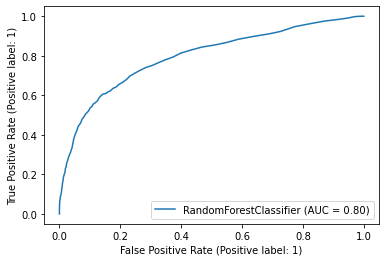

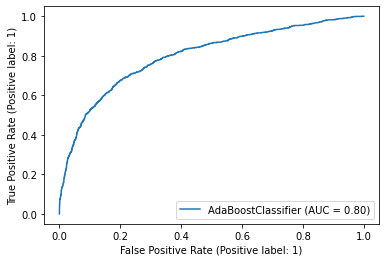

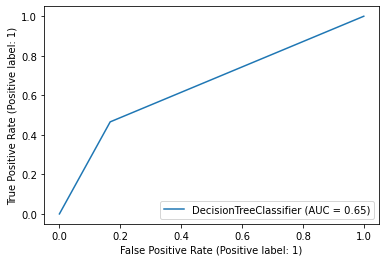

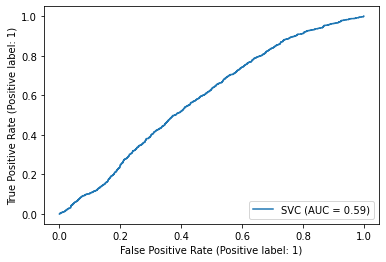

In [12]:
plot_roc_curve(model, x_val, y_val)
plot_roc_curve(model_1, x_val, y_val)
plot_roc_curve(model_2, x_val, y_val)
plot_roc_curve(model_3, x_val, y_val)

## Storing the models

In [13]:
import joblib

In [14]:
joblib.dump(model, "../models/model.bin")

['../models/model.bin']

In [15]:
joblib.dump(model_1, "../models/model_1.bin")

['../models/model_1.bin']

In [16]:
joblib.dump(model_2, "../models/model_2.bin")

['../models/model_2.bin']

In [17]:
joblib.dump(model_3, "../models/model_3.bin")

['../models/model_3.bin']